In [102]:
import numpy as np

folder = './results/'
results_files = [
    'l2neuron',
    'l2layer',
    'l1',
    'nopenalty',
    'l1times10',
    'l1fanout',
]
    
results = {file:np.loadtxt(folder + file + '.txt') for file in results_files}

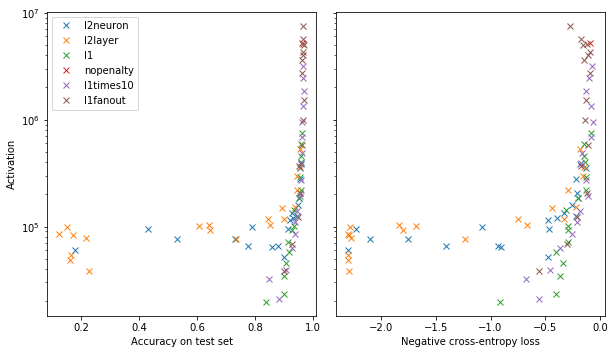

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(9, 5), sharey=True)
for (key, data) in results.items():
    penalty, activation, test_acc, loss = data.T
    ax[0].plot(test_acc, activation, 'x', label=key)
    ax[1].plot(-loss, activation, 'x', label=key)

ax[0].set_xlabel("Accuracy on test set")
ax[1].set_xlabel("Negative cross-entropy loss")
ax[0].set_ylabel("Activation")
ax[0].legend()
plt.tight_layout()
plt.yscale('log')

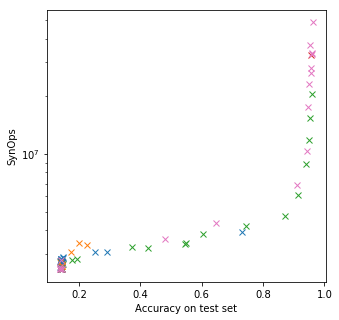

In [105]:
file = np.loadtxt('spk_results.txt', dtype=str)

modelsym = {'l2layer': 'C0', 'l2neuron': 'C1',
            'l1': 'C2', 'nopenalty': "C3", 'l1times10': 'C2',
            'weightdecay': 'C4', 'nopen_thres': 'C5', 'l1fanout': 'C6'}

plt.figure(figsize=(5,5))
for (name, acc, synops) in file:
    name = name.split('/')[1].split('_')[0]
    acc = float(acc)
    synops = float(synops)
    
    plt.plot(acc, synops, 'x', label=name, c=modelsym[name])
    
plt.xlabel("Accuracy on test set")
plt.ylabel("SynOps");
plt.yscale('log')

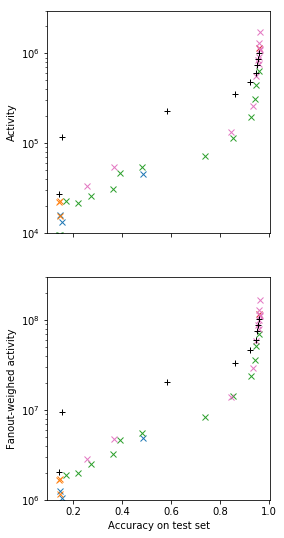

In [133]:
file = np.loadtxt('results/analog_quantized_tests.txt', dtype=str)
names = file[:, 0]
activities = file[:, 1].astype(float)
weighed_activities = file[:, 2].astype(float)
accuracies = file[:, 3].astype(float)

fig, ax = plt.subplots(2, 1, figsize=(4, 9), sharex=True)
for i in range(len(file)):
    name = names[i].split('/')[1].split('_')[0]
    activity, weighed_activity, acc = activities[i], weighed_activities[i], accuracies[i]
    
    ax[0].plot(acc, activity, 'x', label=name, c=modelsym[name])
    ax[1].plot(acc, weighed_activity, 'x', label=name, c=modelsym[name])
    
ax[1].set_xlabel("Accuracy on test set")
ax[0].set_ylabel("Activity");
ax[1].set_ylabel("Fanout-weighed activity")
ax[0].set_yscale('log')
ax[1].set_yscale('log')
# ax[0].set_xscale('log')
ax[1].set_ylim([1e6, 3e8])
ax[0].set_ylim([1e4, 3e6]);

## WEIGHT RESCALING
file = np.loadtxt('results/weightscaled_quantized_tests.txt', dtype=str)
activities = file[:, 1].astype(float)
weighed_activities = file[:, 2].astype(float)
accuracies = file[:, 3].astype(float)

ax[0].plot(accuracies, activities, '+k')
ax[1].plot(accuracies, weighed_activities, '+k')